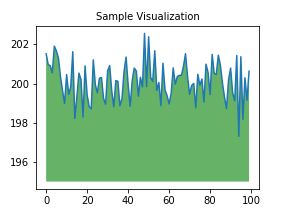

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/ai_job_dataset.csv')

In [ ]:
#understanding the data sets
print("Column names:")
print(df.columns)

print("\nDataset info:")
df.info()


print("\nSummary statistics:")
df.describe()

Column names:
Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [ ]:
# Check if any data is missing
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64


In [ ]:
#dropping missing values
df.dropna(inplace=True)


In [ ]:

df = df[['job_title', 'required_skills', 'education_required', 'salary_usd']]


df.dropna(inplace=True)


df.head()


/tmp/ipython-input-8-1956853706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,job_title,required_skills,education_required,salary_usd
0,AI Research Scientist,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,90376
1,AI Software Engineer,"Deep Learning, AWS, Mathematics, Python, Docker",Master,61895
2,AI Specialist,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,152626
3,NLP Engineer,"Scala, SQL, Linux, Python",PhD,80215
4,AI Consultant,"MLOps, Java, Tableau, Python",Master,54624


In [ ]:
#turning words into numbers - LabelEncoding
from sklearn.preprocessing import LabelEncoder


le_job = LabelEncoder()
le_edu = LabelEncoder()


df['job_title_encoded'] = le_job.fit_transform(df['job_title'])
df['education_encoded'] = le_edu.fit_transform(df['education_required'])


df['skill_count'] = df['required_skills'].apply(lambda x: len(x.split(',')))


df[['job_title', 'required_skills', 'education_required', 'job_title_encoded', 'education_encoded', 'skill_count', 'salary_usd']].head()


/tmp/ipython-input-9-1563020763.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_title_encoded'] = le_job.fit_transform(df['job_title'])
/tmp/ipython-input-9-1563020763.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_encoded'] = le_edu.fit_transform(df['education_required'])
/tmp/ipython-input-9-1563020763.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,job_title,required_skills,education_required,job_title_encoded,education_encoded,skill_count,salary_usd
0,AI Research Scientist,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,3,1,5,90376
1,AI Software Engineer,"Deep Learning, AWS, Mathematics, Python, Docker",Master,4,2,5,61895
2,AI Specialist,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,5,0,5,152626
3,NLP Engineer,"Scala, SQL, Linux, Python",PhD,16,3,4,80215
4,AI Consultant,"MLOps, Java, Tableau, Python",Master,1,2,4,54624


In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df[['job_title_encoded', 'education_encoded', 'skill_count']]
y = df['salary_usd']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


y_pred_lr = model_lr.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 3648732869.47
R² Score: -0.00


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model_nn = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_nn.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1)  # Output layer: 1 neuron for salary prediction
])


model_nn.compile(optimizer='adam', loss='mean_squared_error')


model_nn.fit(X_train_nn, y_train_nn, epochs=100, batch_size=8, verbose=1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 16685617152.0000
Epoch 2/100
 532/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 16589364224.0000

KeyboardInterrupt: 

In [ ]:
# Predict salaries using the neural network
y_pred_nn = model_nn.predict(X_test_nn)

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score

mse_nn = mean_squared_error(y_test_nn, y_pred_nn)
r2_nn = r2_score(y_test_nn, y_pred_nn)

print(f"Neural Network MSE: {mse_nn:.2f}")
print(f"Neural Network R² Score: {r2_nn:.2f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network MSE: 16100640768.00
Neural Network R² Score: -3.41


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


y_pred_lr = model_lr.predict(X_test)
y_pred_nn = model_nn.predict(X_test)


mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)

print("Linear Regression - MAE:", mae_lr, "RMSE:", rmse_lr)
print("Neural Network - MAE:", mae_nn, "RMSE:", rmse_nn)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Linear Regression - MAE: 47109.78978215473 RMSE: 60404.74211080047
Neural Network - MAE: 97275.6875 RMSE: 114873.37251077815


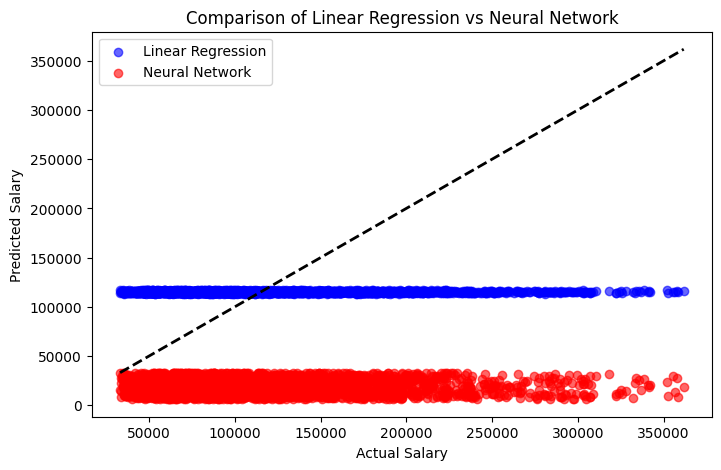

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression', alpha=0.6)
plt.scatter(y_test, y_pred_nn, color='red', label='Neural Network', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.legend()
plt.title("Comparison of Linear Regression vs Neural Network")
plt.show()


In [ ]:
from scipy.stats import zscore
import pandas as pd


df['salary_zscore'] = zscore(df['salary_usd'])


outliers = df[df['salary_zscore'].abs() > 3]
print(outliers)


                       job_title  \
67     Machine Learning Engineer   
137    Machine Learning Engineer   
185       Deep Learning Engineer   
215         AI Software Engineer   
317               Data Scientist   
...                          ...   
14705              Data Engineer   
14773               Data Analyst   
14872              AI Specialist   
14916   Principal Data Scientist   
14977         Research Scientist   

                                         required_skills education_required  \
67                        Python, Scala, Statistics, Git          Associate   
137                      Hadoop, Python, Git, TensorFlow                PhD   
185                                Python, TensorFlow, R           Bachelor   
215                GCP, Azure, Deep Learning, Spark, SQL                PhD   
317                          Docker, Python, Mathematics             Master   
...                                                  ...                ...   
14705         

/tmp/ipython-input-16-2245108983.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary_zscore'] = zscore(df['salary_usd'])


<Axes: xlabel='salary_usd'>

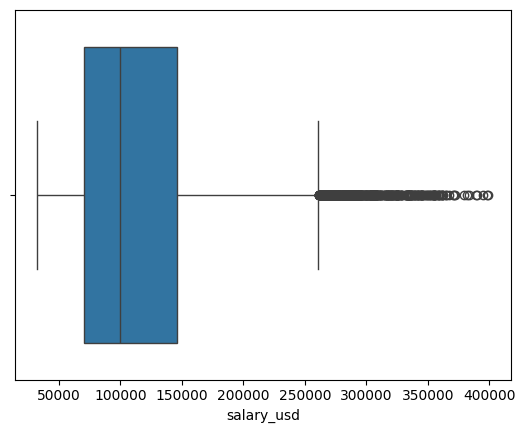

In [ ]:
import seaborn as sns
sns.boxplot(x=df['salary_usd'])


In [ ]:
import joblib
model_nn.save('model_nn.h5')
joblib.dump(model_lr, 'model_lr.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
model_nn.save("model_nn.h5")
from google.colab import files
files.download("model_nn.h5")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>